In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import numpy as np

class PointPicker:
    def __init__(self, imgplot, img, color=(255,0,0), radius=20, thickness=20):
        self.imgplot = imgplot
        self.img = img
        self.color = color
        self.radius = radius
        self.thickness = thickness
        self.cid = imgplot.figure.canvas.mpl_connect('button_press_event', self)
        self.points = []
    
    def __call__(self, event):
        if event.inaxes != self.imgplot.axes: 
            return
        ix = event.xdata
        iy = event.ydata
        print(f'x={ix}, y={iy}')
        self.img = cv.circle(self.img, (int(ix), int(iy)), self.radius, self.color, self.thickness)
        self.points.append((int(ix), int(iy)))
        
        imgplot.set_array(self.img)
        self.imgplot.figure.canvas.draw()

In [39]:
%matplotlib tk

img1 = cv.imread('data/1-left.jpeg')         
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
imgplot = plt.imshow(img1)
point_picker = PointPicker(imgplot, img1)
plt.show()

x=2985.7812903225804, y=1092.7182709677422
x=3365.569677419355, y=1113.528593548387
x=3287.5309677419355, y=1633.7866580645164
x=3084.630322580645, y=1670.204722580645


dst_pts = 
 [(2985, 1092), (3365, 1113), (3287, 1633), (3084, 1670)]


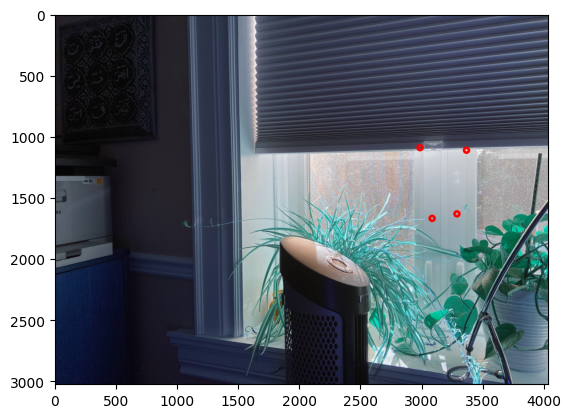

In [40]:
%matplotlib inline

dst_pts = point_picker.points
print('dst_pts = \n', dst_pts)
plt.imshow(point_picker.img)
plt.show()

In [41]:
%matplotlib tk

img2 = cv.imread('data/1-right.jpeg')         
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
imgplot = plt.imshow(img2)
point_picker = PointPicker(imgplot, img2)
plt.show()

x=25.51290322580644, y=1022.4574193548387
x=634.2148387096775, y=1079.6858064516127
x=608.201935483871, y=1589.5387096774193
x=374.0858064516128, y=1662.3748387096775


src_pts = 
 [(25, 1022), (634, 1079), (608, 1589), (374, 1662)]


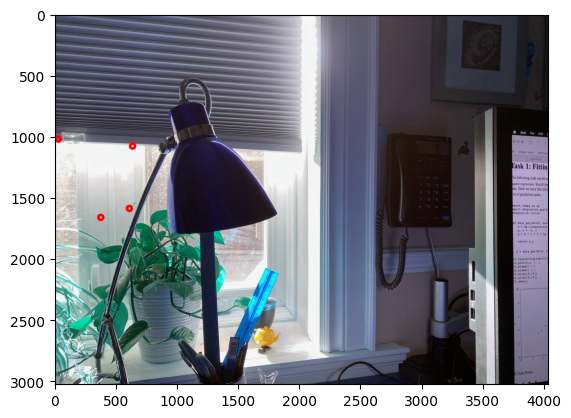

In [42]:
%matplotlib inline

src_pts = point_picker.points
print('src_pts = \n', src_pts)
plt.imshow(point_picker.img)
plt.show()

In [43]:
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=200)

n_pts = len(src_pts)
A = np.zeros((n_pts*2, 9))
for i in range(0, n_pts*2, 2):
    j = int(i/2)
    x = src_pts[j][0]
    y = src_pts[j][1]
    xd = dst_pts[j][0]
    yd = dst_pts[j][1]

    A[i, 0] = x
    A[i, 1] = y
    A[i, 2] = 1
    A[i, 6] = -(x*xd)
    A[i, 7] = -(y*xd)
    A[i, 8] = -xd

    A[i+1, 3] = x
    A[i+1, 4] = y
    A[i+1, 5] = 1
    A[i+1, 6] = -(x*yd)
    A[i+1, 7] = -(y*yd)
    A[i+1, 8] = -yd

print('A = \n', A)

U, D, Vh = np.linalg.svd(A, full_matrices=True)
print('U = \n', U)
print('D = \n', D)
print('Vh = \n', Vh)

H_vec = Vh[-1]
print('H_vec = \n', H_vec)
print('A @ H_vec = \n', A @ H_vec)

H = np.reshape(H_vec, (-1, 3))
print('H = \n', H)

A = 
 [[      25.     1022.        1.        0.        0.        0.   -74625. -3050670.    -2985.]
 [       0.        0.        0.       25.     1022.        1.   -27300. -1116024.    -1092.]
 [     634.     1079.        1.        0.        0.        0. -2133410. -3630835.    -3365.]
 [       0.        0.        0.      634.     1079.        1.  -705642. -1200927.    -1113.]
 [     608.     1589.        1.        0.        0.        0. -1998496. -5223043.    -3287.]
 [       0.        0.        0.      608.     1589.        1.  -992864. -2594837.    -1633.]
 [     374.     1662.        1.        0.        0.        0. -1153416. -5125608.    -3084.]
 [       0.        0.        0.      374.     1662.        1.  -624580. -2775540.    -1670.]]
U = 
 [[-0.28856104 -0.58896827 -0.17214143 -0.61608253  0.21537473  0.27023237  0.00804039  0.20293371]
 [-0.10556404 -0.2154618   0.30007083 -0.26016693 -0.56290094 -0.62245435  0.26333487  0.10512364]
 [-0.40567586  0.6152239  -0.17573946 -0.4927

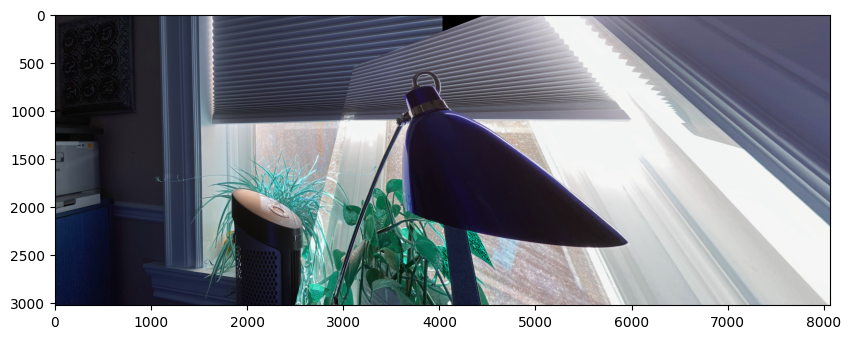

In [62]:
img1 = cv.imread('data/1-left.jpeg')
img2 = cv.imread('data/1-right.jpeg')
h, w, c = img1.shape

img = np.zeros((h, w*2, 3), np.uint8)
img[0:img1.shape[0], 0:img1.shape[1]] = img1 # put in the dst img
warp_img = cv.warpPerspective(img2, H, ((img1.shape[1] + img2.shape[1]), img2.shape[0])) # transform src img with homography mtrx
valid_mask = (warp_img[:, :, :] != 0).all(axis=-1) # only use non-zero pixels from the warp img
img[valid_mask] = warp_img[valid_mask] # merge non-zero pixels from the warp img with the src img

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()